## 와인의 품질 선별 모델
<hr>

### 1) 모듈 불러오기

- import pandas as pd

- from sklearn.neighbors import KNeighborsClassifier

### 2. 데이터 프레임으로 불러오기.

- 구분자를 ';'으로 하여 파일을 데이터 프레임으로 불러오기.

- isna()로 결측치 확인하고 sum()을 써서 결측치의 개수를 추출한다.

- unique를 써서 이상치를 확인한다. / boxplot으로 이상치 확인.

- duplicated()를 써서 중복값을 확인하고 sum()을 써서 중복값의 개수를 추출한다.

- 데이터프레임.corr()를 써서 상관관계 계산.

- abs를 써서 값을 절댓값으로 변환한 다음 sort로 내림차순 정렬하여 상관관계가 가장 높은 두 개의 컬럼을 피처로 선택한다.

- quality(품질) 컬럼을 타겟으로 선택한다.

#### + 시각화
- 산점도, 히스토그램, 히트맵 등을 통해서 분포를 확인한다.

### 3. 기계학습 준비

- 데이터프레임.sample(frac = 확률) # 확률 1 = 100% 데이터를 100% 섞는다. ==> 섞는 이유??? 

- from sklearn.model_selection import train_test_split 불러오기

- 피처와 타겟을 추출한다. (featureDF, targetSR)

- train_test_split(피처, 타겟, test_size = 확률) # 시험집단 확률을 지정.
- X_train, X_test, y_train, y_test = train_test_split(featureDF, targetSR, test_size=0.2)

### 4. 표준 정규분포 스케일링 
#### (스케일이 많이 차이나지 않으면 생략 가능.)

- from sklearn.preprocessing import StandardScaler

- 평균 0, 편차 1

- 스케일러 인스턴스 생성 : scaler = StandardScaler()

- 데이터에 대한 평균, 표준편차 계산 진행 : scaler.fit() 메서드

- 데이터에 대한 스케일링 진행 : scaler.transform() 메서드
- → 자료의 규모(스케일)이 다르면 비교하기 어렵기 때문에 표준 정규 분포로 스케일링하면 모든 특성이 동일한 척도로 조정되므로 특성 간의 비교가 더욱 용이해 진다.
- → 이상치의 영향을 줄일 수 있다.


    * y값은 Y 값은 모델이 예측하려는 대상이기 때문에 이 예측 값은 원래 데이터의 척도(scale)를 유지해야 한다. => 정규화 하지 않는다.

    * 훈련용 데이터와 테스트용 데이터가 나눠지고 나서 해야 함.

### 5. 기계학습 진행
- 모델 인스턴스 생성
ex) model = KNeighborsClassifier()

- 학습용 데이터 x_train, y_train으로 학습 진행

### 6. 학습 및 테스트 데이터에 대한 점수 확인.

- train 및 test에 대한 정확도를 계산해서 저장할 빈 리스트를 2개 생성.

- for문을 사용해서 k 값을 1부터 99까지 반복하여 테스트 한다.

- 모델이름 = KNeighborsClassifier(n_neighbors=k)

- model.fit(X_train 데이터, Y_train 데이터)

- model.score(X_train 데이터, Y_train 데이터)

- train_scoreList와 test_scoreList에 각각의 model.score를 append한다.

- 각 리스트를 출력하므로서 데이터에 대한 점수 확인.

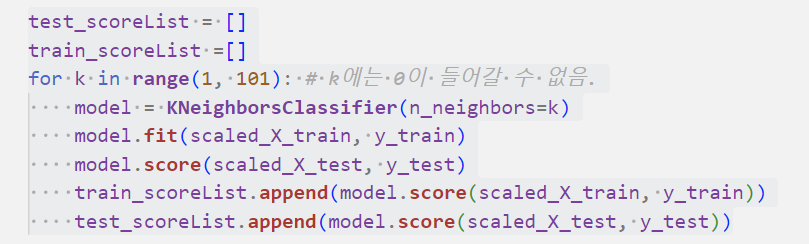

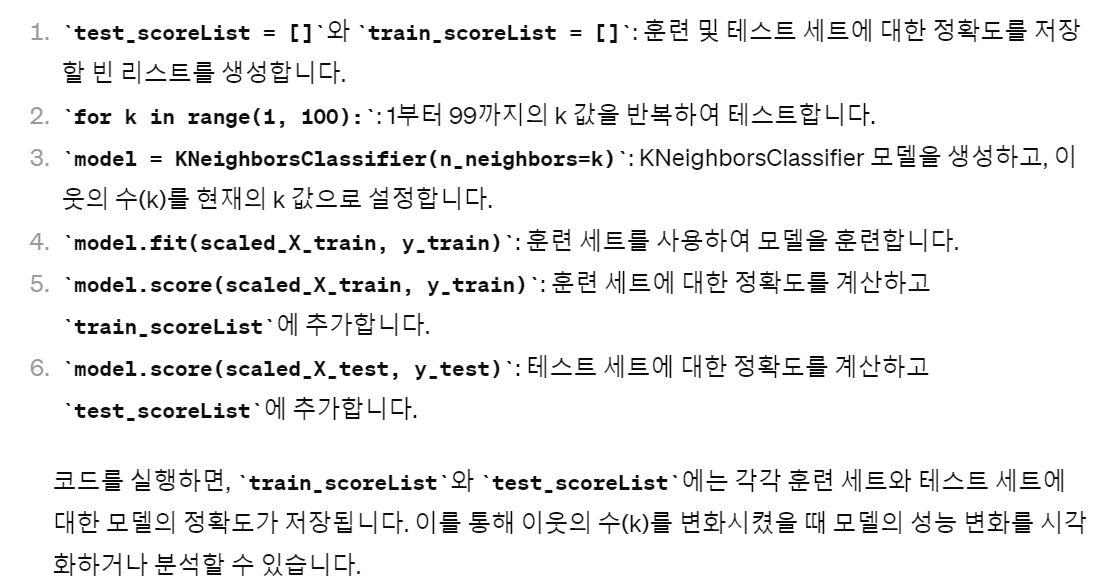

#### + 시각화 K 개수에 따른 학습용 / 테스트용 점수 시각화
- plt.plot(train_scoreList, 'b--', label = 'Train Score')

- plt.plot(test_scoreList, 'r-', label = 'Test Score')

- plt.title('K&score')

- plt.xlabel('K')

- plt.ylabel('Score')

- plt.legend()

- plt.show()

### 7. 
- test score list 안에 최댓값의 인덱스를 찾는다.
test_scoreList.index(max(test_scoreList))

- k를 test score list 최댓값 인덱스 + 1로 지정

- 모델에 스케일링 한 X 테스트 데이터와 y 테스트 데이터의 점수 출력.